In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=2500)

In [3]:
def decode_newswire_to_english(index):
    word_index = reuters.get_word_index()
    reserve_word_index = dict([(value,key) for (key,value) in word_index.items()])
    decoded_newswire = ' '.join([reserve_word_index.get(i-3,'?') for i in train_data[index]]) 
    return decoded_newswire                 

In [4]:
print(decode_newswire_to_english(3))

? the farmers home administration the u s agriculture department's farm lending ? could ? about seven billion dlrs in outstanding principal on its ? ? ? or about one fourth of its farm loan portfolio the general accounting office ? said in remarks prepared for delivery to the senate agriculture committee ? ? senior ? director of ? also said that a preliminary ? of proposed changes in ? financial ? ? indicated as many as one half of ? ? who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed ? ? credit using a ? of financial ? instead of ? ? on ? ability senate agriculture committee chairman ? ? d ? ? the proposed ? changes ? ? ? ? ? at a hearing that they would mark a ? shift in the ? ? away from being ? ? of last ? toward ? a big city bank but ? ? the new regulations saying the agency had a ? to ? its 70 billion dlr loan portfolio in a ? yet ? ? ? of ? ? ? ? said the proposed credit ? system ? to ensure that ? would make loans only t

In [5]:
import numpy as np

In [6]:
def vectorize_sequence(sequences,dimension=2500):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

In [7]:
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)
one_hot_train_label = to_one_hot(train_labels)
#using keras library :- one_hot_train_label = to_categorical(train_labels) 
one_hot_test_label = to_one_hot(test_labels)
#using keras library :- one_hot_test_label = to_categorical(test_labels) 

In [31]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(2500,)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_label[:1000]
partial_y_train = one_hot_train_label[1000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 116us/step - loss: 2.4680 - acc: 0.5066 - val_loss: 1.6542 - val_acc: 0.6310
Epoch 2/20
7982/7982 [==============================] - 1s 65us/step - loss: 1.4495 - acc: 0.6885 - val_loss: 1.3255 - val_acc: 0.6960
Epoch 3/20
7982/7982 [==============================] - 1s 77us/step - loss: 1.1630 - acc: 0.7459 - val_loss: 1.1694 - val_acc: 0.7360
Epoch 4/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.9850 - acc: 0.7849 - val_loss: 1.0499 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.8342 - acc: 0.8141 - val_loss: 1.0059 - val_acc: 0.7690
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.7271 - acc: 0.8356 - val_loss: 0.9481 - val_acc: 0.7950
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.6230 - acc: 0.8603 - val_loss: 0.9021 - val_acc: 0.8040
Epoch 

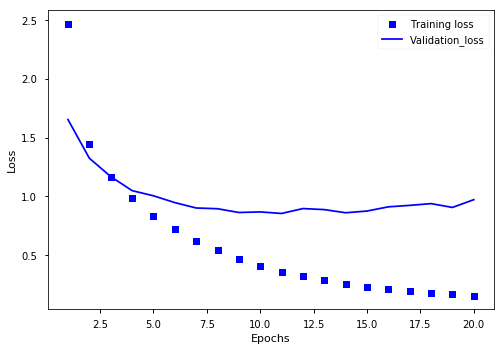

In [32]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
with plt.style.context('seaborn-notebook'):
    plt.figure()
    plt.plot(epochs,loss,'bs',label='Training loss')
    plt.plot(epochs,val_loss,'b',label='Validation_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

<Figure size 432x288 with 0 Axes>

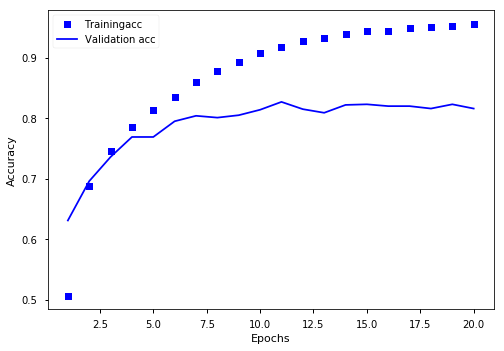

In [33]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)
with plt.style.context('seaborn-notebook'):
    plt.figure()
    plt.plot(epochs,acc,'bs',label='Trainingacc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(2500,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_label[:1000]
partial_y_train = one_hot_train_label[1000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))
results = model.evaluate(x_test,one_hot_test_label)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 96us/step - loss: 2.6851 - acc: 0.4372 - val_loss: 1.8080 - val_acc: 0.6270
Epoch 2/9
7982/7982 [==============================] - 0s 58us/step - loss: 1.5280 - acc: 0.6794 - val_loss: 1.3536 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 0s 58us/step - loss: 1.2023 - acc: 0.7375 - val_loss: 1.1739 - val_acc: 0.7450
Epoch 4/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.0072 - acc: 0.7846 - val_loss: 1.0841 - val_acc: 0.7640
Epoch 5/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.8629 - acc: 0.8130 - val_loss: 1.0005 - val_acc: 0.7870
Epoch 6/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.7515 - acc: 0.8327 - val_loss: 0.9599 - val_acc: 0.7940
Epoch 7/9
7982/7982 [==============================] - 1s 83us/step - loss: 0.6496 - acc: 0.8562 - val_loss: 0.9153 - val_acc: 0.8030
Epoch 8/9
7982

In [20]:
results

[0.9638658019971975, 0.784060552092609]

In [22]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

0.9999999

In [25]:
np.argmax(predictions[0])

3

In [34]:
# different way to handle the labels and the loss
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# model.complie(optimizer='rmsprop',
#                loss='sparse_categorical_crossentropy',
#                metrics=['acc'])
#Note :- this new loss function is mathematically the same as categorical
#        it just has a different interface